In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import regularizers
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Two-Genre Classification 
## Horror vs. Romance

In [3]:
img_width, img_height = 92,138

train_data_dir = 'horror_vs_romance/train'
validation_data_dir = 'horror_vs_romance/validation'
nb_train_samples = 800
nb_validation_samples = 200
epochs = 100
batch_size = 20
input_shape = (img_width, img_height, 3)

In [4]:
keras.optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/100
40/40 [==============================] - 28s - loss: 1.3975 - acc: 0.5788 - val_loss: 0.9992 - val_acc: 0.6500
Epoch 2/100
40/40 [==============================] - 28s - loss: 0.9223 - acc: 0.6550 - val_loss: 0.7096 - val_acc: 0.7600
Epoch 3/100
40/40 [==============================] - 28s - loss: 0.7296 - acc: 0.6925 - val_loss: 0.5839 - val_acc: 0.7450
Epoch 4/100
40/40 [==============================] - 28s - loss: 0.6545 - acc: 0.7313 - val_loss: 0.6066 - val_acc: 0.7200
Epoch 5/100
40/40 [==============================] - 27s - loss: 0.6164 - acc: 0.7312 - val_loss: 0.5385 - val_acc: 0.7900
Epoch 6/100
40/40 [==============================] - 28s - loss: 0.5857 - acc: 0.7175 - val_loss: 0.6644 - val_acc: 0.6900
Epoch 7/100
40/40 [==============================] - 27s - loss: 0.5906 - acc: 0.7288 - val_loss: 0.5732 - val_acc: 0.7900
Epoch 8/100
40/40 [==============================] - 26s 

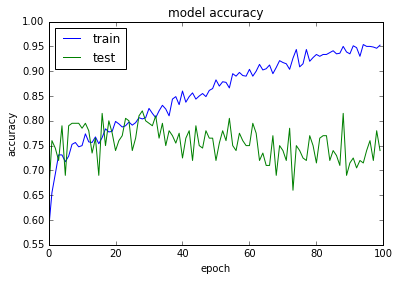

In [5]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

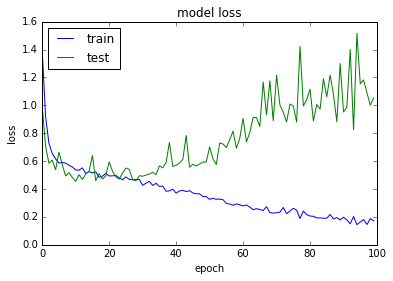

In [6]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Three-Genre Classification
## Horror vs. Romance vs. Scifi

In [7]:
img_width, img_height = 92,138

train_data_dir = 'horror_vs_romance_vs_scifi/train'
validation_data_dir = 'horror_vs_romance_vs_scifi/validation'
nb_train_samples = 1064
nb_validation_samples = 266
epochs = 100
batch_size = 20
input_shape = (img_width, img_height, 3)

In [8]:
keras.optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 1064 images belonging to 3 classes.
Found 266 images belonging to 3 classes.
Epoch 1/100
53/53 [==============================] - 36s - loss: 1.5747 - acc: 0.4302 - val_loss: 1.2277 - val_acc: 0.4462
Epoch 2/100
53/53 [==============================] - 35s - loss: 1.1339 - acc: 0.5171 - val_loss: 0.9762 - val_acc: 0.5691
Epoch 3/100
53/53 [==============================] - 35s - loss: 1.0326 - acc: 0.5405 - val_loss: 0.9399 - val_acc: 0.6016
Epoch 4/100
53/53 [==============================] - 35s - loss: 1.0143 - acc: 0.5405 - val_loss: 1.0294 - val_acc: 0.5081
Epoch 5/100
53/53 [==============================] - 34s - loss: 1.0062 - acc: 0.5520 - val_loss: 0.9556 - val_acc: 0.5813
Epoch 6/100
53/53 [==============================] - 34s - loss: 0.9766 - acc: 0.5726 - val_loss: 0.9362 - val_acc: 0.6098
Epoch 7/100
53/53 [==============================] - 34s - loss: 0.9363 - acc: 0.5841 - val_loss: 0.9035 - val_acc: 0.5488
Epoch 8/100
53/53 [==============================] - 35s

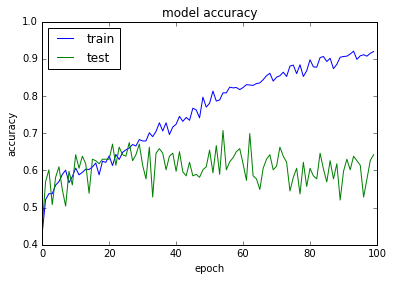

In [9]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

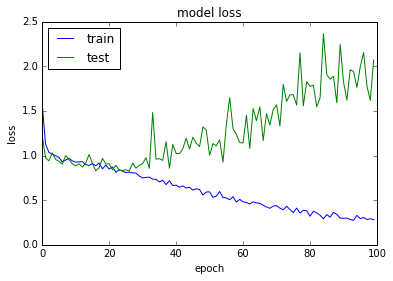

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')